Import relevant modules

In [2]:
#import seaborn as sns
import filehandler as tx
import file_loader as ld
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Global variables

In [6]:
load_cutoff = 75

margin_step = .1

main_dir = '90814 (Bulk 3kDa)\\Annealing30min2k260degree'

temps, file_dict = tx.files_to_dict(main_dir)       #Fetch temperature list and file names from directory

print (file_dict)
#print(file_dict[temps[2]][1])


{-80: ['Segment08_minus80deg.txt', 'Segment12_minus80deg_ref.txt'], 100: ['Segment98_100deg.txt', 'Segment102_100deg_ref.txt'], 120: ['Segment108_120deg.txt', 'Segment112_120deg_ref.txt'], 140: ['Segment118_140deg.txt', 'Segment122_140deg_ref.txt'], 160: ['Segment128_160deg.txt', 'Segment132_160deg_ref.txt'], 180: ['Segment138_180deg.txt', 'Segment142_180deg_ref.txt'], 200: ['Segment148_200deg.txt', 'Segment152_200deg_ref.txt'], 220: ['Segment158_220deg.txt', 'Segment162_220deg_ref.txt'], 240: ['Segment168_240deg.txt', 'Segment172_240deg_ref.txt'], 260: ['Segment178_260deg.txt', 'Segment182_260deg_ref.txt'], -60: ['Segment18_minus60deg.txt', 'Segment22_minus60deg_ref.txt'], -40: ['Segment28_minus40deg.txt', 'Segment32_minus40deg_ref.txt'], -20: ['Segment38_minus20deg.txt', 'Segment42_minus20deg_ref.txt'], 0: ['Segment48_0deg.txt', 'Segment52_0deg_ref.txt'], 20: ['Segment58_20deg.txt', 'Segment62_20deg_ref.txt'], 40: ['Segment68_40deg.txt', 'Segment72_40deg_ref.txt'], 60: ['Segment78_60

In [7]:
big_data = ld.load_files(main_dir, temps, file_dict, load_cutoff)

Series([], Name: Heat Flow, dtype: float64)


"\nx_start = 0.52  # Starting x position for the scale bar in normalized figure coordinates\n#x_end = 0.52    # Ending x position for the scale bar (slightly offset from center)\ny_position = 0.15  # y position for the scale bar in normalized figure coordinates\ny_hight = .3\n\nscale_bar = Line2D([x_start, x_start], [y_position, y_hight], transform=fig.transFigure, color='black', lw=2)\nfig.add_artist(scale_bar)\nfig.text((x_start) - 0.05, (y_position -y_hight) / 2, 'idk')\n"

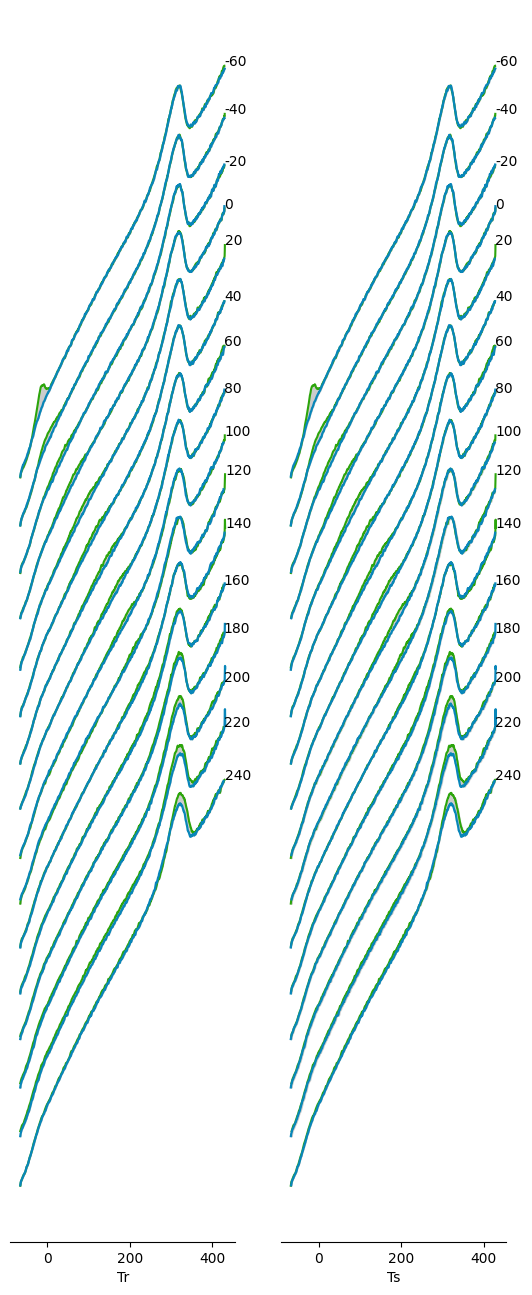

In [14]:
margin = margin_step * (big_data[0][1]['Heat Flow'].max() - big_data[0][1]['Heat Flow'].min())

scale_size = big_data[0][1]['Heat Flow'].max() - big_data[0][1]['Heat Flow'][big_data[0][1]['Heat Flow'].idxmax():].min()

print (big_data[0][0]['Heat Flow'][big_data[0][0]['Heat Flow'].idxmax():])

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=True)
fig.set_figheight(16, 40)
for i in range (1, len(big_data)-1):
    dif = abs(big_data[i][0]['Heat Flow'] - big_data[i-1][0]['Heat Flow']).max()
    big_data[i][0]['Heat Flow'] -= dif + margin
    big_data[i][1]['Heat Flow'] -= dif + margin
    big_data[i][0].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False, style = '#2ca50b')
    big_data[i][1].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False, style = '#0886b9', linewidth = 1.6)
    ax1.text(big_data[i][0]['Tr'].iloc[-1], big_data[i][0]['Heat Flow'].iloc[-1], temps[i])
    if len(big_data[i][0]['Heat Flow']) < len(big_data[i][1]['Heat Flow']):
        ax1.fill_between(big_data[i][0]['Tr'], big_data[i][0]['Heat Flow'], big_data[i][1]['Heat Flow'].iloc[:len(big_data[i][0]['Heat Flow'])], color = '#cccccc')
    else:
        ax1.fill_between(big_data[i][1]['Tr'], big_data[i][0]['Heat Flow'].iloc[:len(big_data[i][1]['Heat Flow'])], big_data[i][1]['Heat Flow'], color = '#cccccc')

#margin = margin_step * (big_data[0][1]['Heat Flow'].max() - big_data[0][1]['Heat Flow'].min())
#plt.figure(figsize=(6, 20))

for i in range (1, len(big_data)-1):
    big_data[i][0].plot(x = 'Ts', y = 'Heat Flow', ax = ax2, legend=False, style = '#2ca50b')
    big_data[i][1].plot(x = 'Ts', y = 'Heat Flow', ax = ax2, legend=False, style = '#0886b9', linewidth = 1.6)
    ax2.text(big_data[i][0]['Ts'].iloc[-1], big_data[i][0]['Heat Flow'].iloc[-1], temps[i])
    if len(big_data[i][0]['Heat Flow']) < len(big_data[i][1]['Heat Flow']):
        ax2.fill_between(big_data[i][0]['Ts'], big_data[i][0]['Heat Flow'], big_data[i][1]['Heat Flow'].iloc[:len(big_data[i][0]['Heat Flow'])], color = '#cccccc')
    else:
        ax2.fill_between(big_data[i][1]['Ts'], big_data[i][0]['Heat Flow'].iloc[:len(big_data[i][1]['Heat Flow'])], big_data[i][1]['Heat Flow'], color = '#cccccc')

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.yaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax1.tick_params(axis='y', which='both', length=0)
ax2.tick_params(axis='y', which='both', length=0)

'''
x_start = 0.52  # Starting x position for the scale bar in normalized figure coordinates
#x_end = 0.52    # Ending x position for the scale bar (slightly offset from center)
y_position = 0.15  # y position for the scale bar in normalized figure coordinates
y_hight = .3

scale_bar = Line2D([x_start, x_start], [y_position, y_hight], transform=fig.transFigure, color='black', lw=2)
fig.add_artist(scale_bar)
fig.text((x_start) - 0.05, (y_position -y_hight) / 2, 'idk')
'''